# 第二章 感知机

**感知机**：
- 适应的对象：是±1的分类问题，也就是二分类问题
- 原理：在n维空间中找到一个超平面将数据集一份为二，一个结果为+1，另一个为-1
- 策略：通过最小化所有点到超平面的距离
- 算法：梯度下降
    - 原始形式
    - 对偶形式：把$w^0$ $b^0$初始值设置为0，这样计算的时候每个迭代都可以从Gram矩阵中获取数据

## 几何公式
三维空间的平面方程：$Ax + By + Cz + D = 0$<br><br>
n维空间的平面方程：$w\cdot x + b$，其中
- $w = (w^1, w^2, w^3, ..., w^n)^T$
- $x = (x^1, x^2, x^3, ..., x^n)^T$

点面距离：$$d = \frac{{|A \cdot x_0 + B \cdot y_0 + C \cdot z_0 + D|}}{{\sqrt{{A^2 + B^2 + C^2}}}} $$
n维空间的点面距离公式的向量形式：$$\frac{1}{||w||}|w\cdot x_0 +b|$$

**梯度**
- 是一个向量，表示函数在某一点的最大变化率和方向

## 数学方法实现
只有感知机的原始形式，未包含对偶形式

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 加载数据

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.label.value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

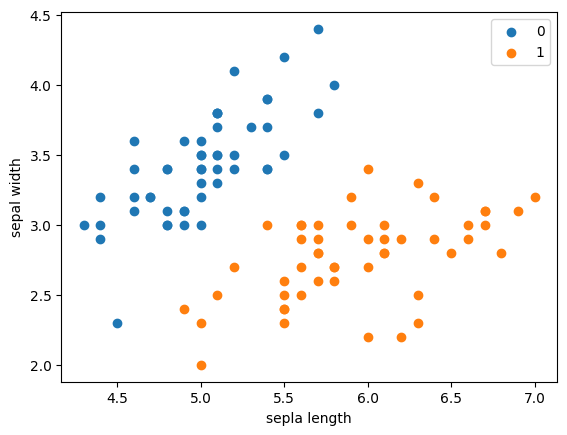

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
# plt.scatter(df[100:]['sepal length'], df[100:]['sepal width'], label='2')
plt.xlabel('sepla length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
# 数据转换为ndarray
data = np.array(df.iloc[:100, [0, 1, -1]])
X = data[:, :-1]
y = data[:, -1]

In [7]:
# 把 y 转换为 +1 和 -1
y = np.array([1 if item == 1 else -1 for item in y])

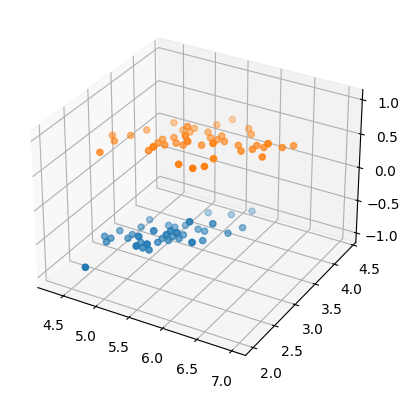

In [8]:
# 在三位图上展示需要分类的点
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:50, 0], X[:50, 1], y[:50])
ax.scatter(X[50:, 0], X[50:, 1], y[50:])

In [77]:
class Model:
    def __init__(self):
        self.w = np.ones(data.shape[1] - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1

    def sign(self, x, w, b):
        y = np.dot(x, w) + b
        return y
    
    def fit(self, X_train, Y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                x = X_train[d]
                y = Y_train[d]
                if y * self.sign(x, self.w, self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, x)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
            # return 'Perceptron Model!'  # 如果在这里return，那么第一个循环结束的时候fit函数就运行结束了，不会再继续执行，始终只会迭代1次
        return 'Perceptron Model!'
        
    def score(self):
        pass

In [34]:
perceptron = Model()
perceptron.fit(X, y)
print(perceptron.w)
print(perceptron.b)

[  7.8 -10. ]
-12.099999999999973


本感知机学习的结果是：$w^1\cdot x^1 + w^2\cdot x^2 + b = 0$，这里的$x^2$是画时的$y$，因此：$$y = x^2 = -\frac{(w^1 \cdot x^1 +b)}{w^2}$$

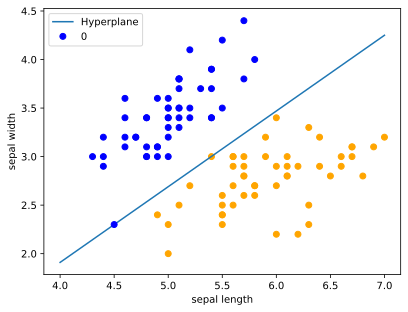

In [40]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_, label='Hyperplane')

plt.plot(data[:50, 0], data[:50, 1], 'bo', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.scatter(data[50:100, 0], data[50:100, 1], c='orange')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

## 通过`sklearn`实现

In [2]:
import sklearn
from sklearn.linear_model import Perceptron

### Sklearn-Perceptron的参数及属性
`Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, eta0=1.0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, random_state=None, verbose=0, n_jobs=None, **kwargs)
`<br>

下面是每个参数的具体含义：
- penalty（默认为None）：惩罚（正则化）项的类型。可以是None（无正则化）、'l2'（L2正则化）或'l1'（L1正则化）。
- alpha（默认为0.0001）：正则化项的强度，与penalty参数相关。较小的alpha值表示较弱的正则化。
- fit_intercept（默认为True）：指定是否应该存在截距（intercept）。如果设置为False，则模型不会考虑截距。
- max_iter（默认为1000）：算法运行的最大迭代次数。
- tol（默认为0.001）：算法的容差（收敛判据）。当迭代过程中权重向量的更新小于容差时，算法被认为已经收敛。
- shuffle（默认为True）：在每次迭代之前是否对样本进行洗牌。
- eta0（默认为1.0）：学习率的初始值。学习率控制权重的更新步长。
- early_stopping（默认为False）：是否启用提前停止。如果启用，当验证数据上的性能不再改善时，算法将提前停止迭代。
- validation_fraction（默认为0.1）：用于提前停止的验证数据集的比例。
- n_iter_no_change（默认为5）：在启用提前停止时，要等待多少次迭代没有改善验证性能，然后停止迭代。
- class_weight（默认为None）：用于处理不平衡数据集的类别权重。
- warm_start（默认为False）：如果设置为True，则使用前一次调用的解决方案作为初始值进行拟合。
- random_state（默认为None）：用于控制随机数生成的种子。
- verbose（默认为0）：控制输出的详细程度。
- n_jobs（默认为None）：指定并行运行的作业数。如果设置为None，则使用单个作业。<br>

重要的属性：
- coef_：训练后的特征权重（系数）
     - 含义：对应于输入特征的权重值。如果训练数据具有n个特征，coef_将是一个形状为(1, n)的数组，其中每个元素表示相应特征的权重。
- intercept_：训练后的截距项。
    - 含义：模型的截距项（偏置）。对于二元分类，intercept_是一个长度为1的数组。
- n_iter_：实际执行的迭代次数
    - 含义：Perceptron算法在训练数据上实际执行的迭代次数。它可能小于或等于设置的max_iter参数。

In [42]:
sklearn.__version__

'1.2.2'

### 鸢尾花数据集

In [67]:
def display_perceptron(clf):
    # 输出学习后的模型信息
    print('w:', clf.coef_)
    print('b:', clf.intercept_)
    print('n_iter: ', clf.n_iter_)
    
    # 画图展示
    # plt.figure(figsize=(10, 10))
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.title('鸢尾花线性数据示例')

    plt.scatter(data[:50, 0], data[:50, 1], c='b', label='Iris-setosa')
    plt.scatter(data[50:100, 0], data[50:100, 1], c='orange', label='Iris-versicolor')

    x_points = np.linspace(4, 7, 10)
    y_ = -(clf.coef_[0][0] * x_points + clf.intercept_)/clf.coef_[0][1]
    plt.plot(x_points, y_, label='Hyperplane')
    plt.legend()

w: [[ 23.2 -38.7]]
b: [-5.]
n_iter:  8


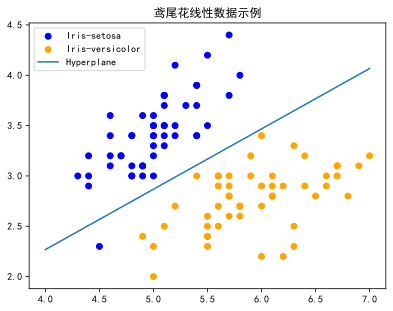

In [68]:
clf_1 = Perceptron(fit_intercept=True, max_iter=1000, shuffle=True)
clf_1.fit(X, y)

display_perceptron(clf_1)

w: [[ 70.7 -87.9]]
b: [-117.]
n_iter:  10000


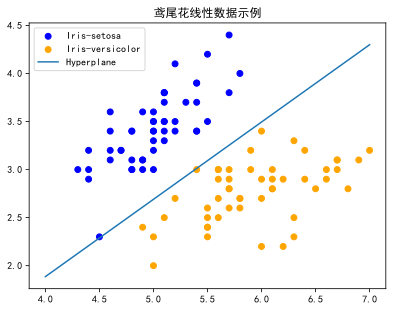

In [70]:
# 设置容差 tol=None
clf_2 = Perceptron(fit_intercept=True, max_iter=10000, shuffle=True, tol=None)
clf_2.fit(X, y)

display_perceptron(clf_2)

In [26]:
# 增加正则化项 penalty='l2'
clf_3 = Perceptron(penalty='l2', alpha=0.00001, fit_intercept=True, max_iter=10000, shuffle=True, tol=None)
clf_3.fit(X, y)

display_perceptron(clf_3)

NameError: name 'display_perceptron' is not defined

### Titanic数据集

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
df_titanic = pd.read_csv('./Datasets/Tatinic/train.csv')

In [5]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 检查哪些列有nan
nan_columns = df_titanic.isnull().any()
nan_columns

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
# 指定列删除nan
df_titanic = df_titanic.dropna(subset=['Age'])
df_titanic.shape

(714, 12)

In [8]:
y = np.array(df_titanic.Survived.replace(0, -1))

In [9]:
df_X = df_titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
df_X['Sex'] = df_X['Sex'].replace({'male': 1, 'female': '0'})
df_X.head()

C:\Users\ingse\AppData\Local\Temp\ipykernel_12268\3495019245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Sex'] = df_X['Sex'].replace({'male': 1, 'female': '0'})


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500


In [10]:
X = np.array(df_X)

In [11]:
random_seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

In [32]:
model_p = Perceptron(penalty='l2', max_iter=100000, fit_intercept=True, shuffle=True, tol=None)
model_p.fit(X_train, y_train)
print('w:', model_p.coef_)
print('b:', model_p.intercept_)
print('n_iter: ', model_p.n_iter_)

w: [[-204.37590751 -662.50995971  -15.69843624 -305.2552872  -105.14133241
    22.56036426]]
b: [1300.]
n_iter:  100000


In [33]:
y_pred = model_p.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Score: ', score)

Score:  0.7342657342657343


# 参考资料
1、[sklearn中文文档](https://www.sklearncn.cn/)<br>
2、[Github-fengdu78](https://nbviewer.org/github/fengdu78/lihang-code/blob/master/%E7%AC%AC02%E7%AB%A0%20%E6%84%9F%E7%9F%A5%E6%9C%BA/2.Perceptron.ipynb)